# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set
Warning - If you have a laptop with i3 please donot run the below code. i5 takes 30 min to run and make sure you close other windows as your CPU will be maxed out. Please ensure heat is allowed to escape and donot run this code when your laptop is over a bed etc. Make sure your laptop is connected to the power source. See image below

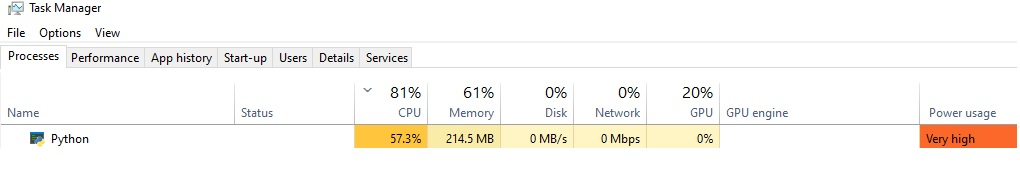

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 64s 256ms/step - loss: 0.6611 - accuracy: 0.5986 - val_loss: 0.6193 - val_accuracy: 0.6595
Epoch 2/25
250/250 [==============================] - 48s 192ms/step - loss: 0.6046 - accuracy: 0.6793 - val_loss: 0.5653 - val_accuracy: 0.7030
Epoch 3/25
250/250 [==============================] - 47s 189ms/step - loss: 0.5649 - accuracy: 0.7080 - val_loss: 0.5409 - val_accuracy: 0.7295
Epoch 4/25
250/250 [==============================] - 47s 190ms/step - loss: 0.5274 - accuracy: 0.7314 - val_loss: 0.5289 - val_accuracy: 0.7430
Epoch 5/25
250/250 [==============================] - 48s 191ms/step - loss: 0.5197 - accuracy: 0.7426 - val_loss: 0.5213 - val_accuracy: 0.7500
Epoch 6/25
250/250 [==============================] - 49s 197ms/step - loss: 0.4896 - accuracy: 0.7595 - val_loss: 0.4899 - val_accuracy: 0.7735
Epoch 7/25
250/250 [==============================] - 48s 190ms/step - loss: 0.4750 - accuracy: 0.7739 - val_loss: 0.4629 - val_ac

## Part 4 - Making a single prediction

In [14]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [15]:
print(prediction)

dog
